# 4A

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [42]:
data=pd.read_csv('glass.csv',header=None)
data.drop(0,axis=1,inplace=True)

In [43]:
data.shape

(214, 10)

In [44]:
data.head()

,1,2,3,4,5,6,7,8,9,10
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [45]:
data.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [46]:
data_y=data[10]

In [47]:
data_y.shape

(214,)

In [48]:
data_x=data.drop(10,axis=1)

In [49]:
data_x.shape

(214, 9)

In [50]:
train_x,test_x,train_y,test_y=train_test_split(data_x,data_y,test_size=0.2)

In [51]:
train_x.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [52]:
train_x[10]=train_y

C:\Users\rahul\AppData\Local\Temp/ipykernel_147172/1271008225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x[10]=train_y


In [53]:
test_x[10]=test_y

C:\Users\rahul\AppData\Local\Temp/ipykernel_147172/761581931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x[10]=test_y


In [54]:
test_x.shape

(43, 10)

In [55]:
train_x.shape

(171, 10)

In [56]:
train_x.to_csv('training.csv',header=None,index=False)

In [57]:
test_x.to_csv('testing.csv',header=None,index=False)

# 4B 

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [59]:
train_x=pd.read_csv('training.csv',header=None)
train_y=train_x[9]
train_x.drop(9,axis=1,inplace=True)

In [60]:
test_x=pd.read_csv('testing.csv',header=None)
test_y=test_x[9]
test_x.drop(9,axis=1,inplace=True)

Text(0.5, 1.0, 'Accuracy Scores of KNN Using Manhattan Distance')

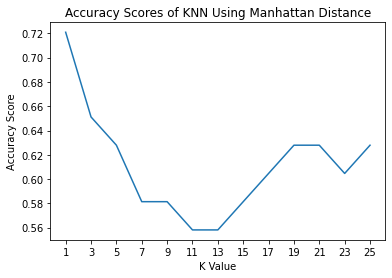

In [61]:
scores_manhattan = {}
for k in range(1,26,2):
   model = KNeighborsClassifier(n_neighbors=k,p=1)
   model.fit(train_x, train_y)
   pred_y = model.predict(test_x)
   scores_manhattan [k] = metrics.accuracy_score(test_y,pred_y)
plt.plot(scores_manhattan .keys(),scores_manhattan .values())
plt.xticks(list(scores_manhattan .keys()))
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of KNN Using Manhattan Distance')

Text(0.5, 1.0, 'Accuracy Scores of KNN Using Euclidian Distance')

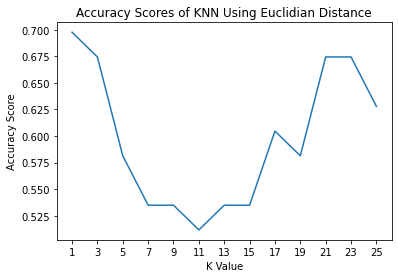

In [62]:
scores_euclidian = {}
for k in range(1,26,2):
   model = KNeighborsClassifier(n_neighbors=k,p=2)
   model.fit(train_x, train_y)
   pred_y = model.predict(test_x)
   scores_euclidian[k] = metrics.accuracy_score(test_y,pred_y)
plt.plot(scores_euclidian.keys(),scores_euclidian.values())
plt.xticks(list(scores_euclidian.keys()))
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of KNN Using Euclidian Distance')

Text(0.5, 1.0, 'Accuracy Scores of KNN Using Minkowski Distance')

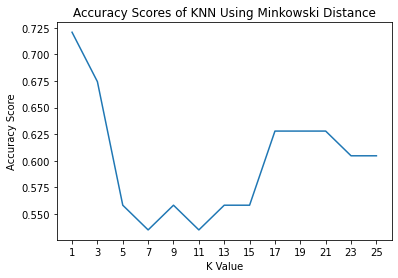

In [63]:
scores_minkowski = {}
for k in range(1,26,2):
   model = KNeighborsClassifier(n_neighbors=k,p=3)
   model.fit(train_x, train_y)
   pred_y = model.predict(test_x)
   scores_minkowski[k] = metrics.accuracy_score(test_y,pred_y)
plt.plot(scores_minkowski.keys(),scores_minkowski.values())
plt.xticks(list(scores_minkowski.keys()))
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of KNN Using Minkowski Distance')

# 4C

In [64]:
from sklearn.model_selection import KFold
Kf = KFold(n_splits=5)
Kf.get_n_splits(data)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in Kf.split(data):
    print("TRAIN:", train_index, "TEST:", test_index)
    

TRAIN: [ 43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  3

In [65]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=214)
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=None, shuffle=False)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.836 (0.075)


In [66]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X, y)
scores = cross_val_score(svm, X, y, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.874 (0.061)


### The logistic regression comes from generalized linear regression.The Support Vector Machines algorithm is much more geometrically motivated. Instead of assuming a probabilistic model, we're trying to find a particular optimal separating hyperplane, where we define "optimality" in the context of the support vectors.We don't have anything resembling the statistical model we use in logistic regression here, even though the linear case will give us similar results.